In [25]:
import nilearn
from nilearn import plotting
from nilearn import datasets
from nilearn import image
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import os

In [45]:
from nilearn.datasets import fetch_spm_auditory

subject_data = fetch_spm_auditory()
print(*subject_data.func[:5], sep="\n")  # print paths of first 5 func images

/Users/zhenwei/nilearn_data/spm_auditory/sub001/fM00223/fM00223_004.img
/Users/zhenwei/nilearn_data/spm_auditory/sub001/fM00223/fM00223_005.img
/Users/zhenwei/nilearn_data/spm_auditory/sub001/fM00223/fM00223_006.img
/Users/zhenwei/nilearn_data/spm_auditory/sub001/fM00223/fM00223_007.img
/Users/zhenwei/nilearn_data/spm_auditory/sub001/fM00223/fM00223_008.img


In [47]:
subject_data.func[0]

'/Users/zhenwei/nilearn_data/spm_auditory/sub001/fM00223/fM00223_004.img'

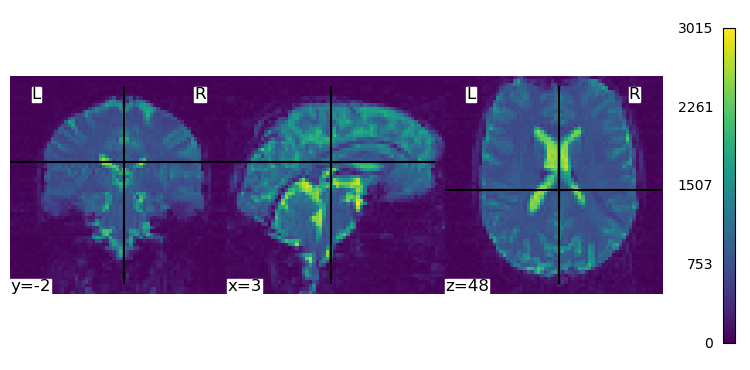

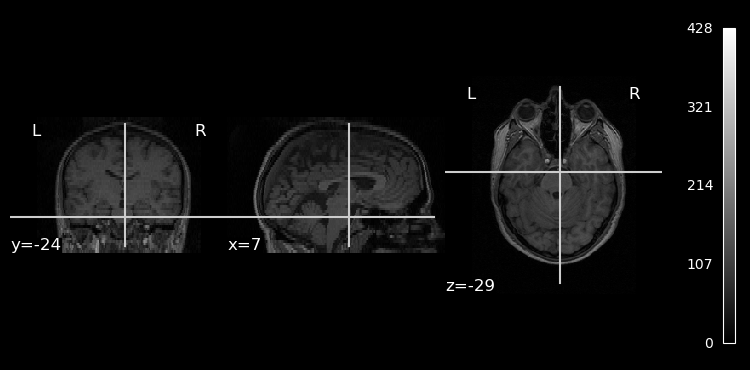

In [46]:
from nilearn.plotting import plot_anat, plot_img, plot_stat_map

plot_img(subject_data.func[0], colorbar=True, cbar_tick_format="%i")
plot_anat(subject_data.anat, colorbar=True, cbar_tick_format="%i")

In [49]:
from nilearn.image import concat_imgs, mean_img

fmri_img = concat_imgs(subject_data.func)
mean_img = mean_img(fmri_img)

In [6]:
import pandas as pd

events = pd.read_table(subject_data["events"])
events

,onset,duration,trial_type
0,0.0,42.0,rest
1,42.0,42.0,active
2,84.0,42.0,rest
3,126.0,42.0,active
4,168.0,42.0,rest
5,210.0,42.0,active
6,252.0,42.0,rest
7,294.0,42.0,active
8,336.0,42.0,rest
9,378.0,42.0,active


In [51]:
from nilearn.glm.first_level import FirstLevelModel

fmri_glm = FirstLevelModel(
    t_r=7,
    noise_model="ar1",
    standardize=False,
    hrf_model="spm",
    drift_model="cosine",
    high_pass=0.01,
)
fmri_glm = fmri_glm.fit(fmri_img, events)
design_matrix = fmri_glm.design_matrices_[0]


In [62]:
fmri_glm.design_matrices_[0]

,active,rest,drift_1,drift_2,drift_3,drift_4,drift_5,drift_6,drift_7,drift_8,drift_9,drift_10,drift_11,drift_12,drift_13,constant
0.0,0.000000,0.000000,0.144318,0.144260,0.144164,0.144029,0.143855,0.143643,0.143392,0.143103,0.142775,0.142410,0.142006,0.141564,0.141084,1.0
7.0,0.000000,0.817784,0.144164,0.143643,0.142775,0.141564,0.140012,0.138122,0.135900,0.133351,0.130480,0.127294,0.123802,0.120012,0.115933,1.0
14.0,0.000000,1.129175,0.143855,0.142410,0.140012,0.136678,0.132429,0.127294,0.121308,0.114511,0.106947,0.098668,0.089729,0.080190,0.070114,1.0
21.0,0.000000,1.022902,0.143392,0.140567,0.135900,0.129452,0.121308,0.111574,0.100378,0.087867,0.074204,0.059569,0.044153,0.028159,0.011795,1.0
28.0,0.000000,1.000997,0.142775,0.138122,0.130480,0.120012,0.106947,0.091567,0.074204,0.055236,0.035071,0.014148,-0.007082,-0.028159,-0.048626,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
637.0,0.809178,0.190822,-0.142775,0.138122,-0.130480,0.120012,-0.106947,0.091567,-0.074204,0.055236,-0.035071,0.014148,0.007082,-0.028159,0.048626,1.0
644.0,1.129985,-0.129985,-0.143392,0.140567,-0.135900,0.129452,-0.121308,0.111574,-0.100378,0.087867,-0.074204,0.059569,-0.044153,0.028159,-0.011795,1.0
651.0,1.023342,-0.023342,-0.143855,0.142410,-0.140012,0.136678,-0.132429,0.127294,-0.121308,0.114511,-0.106947,0.098668,-0.089729,0.080190,-0.070114,1.0
658.0,1.001027,-0.001027,-0.144164,0.143643,-0.142775,0.141564,-0.140012,0.138122,-0.135900,0.133351,-0.130480,0.127294,-0.123802,0.120012,-0.115933,1.0


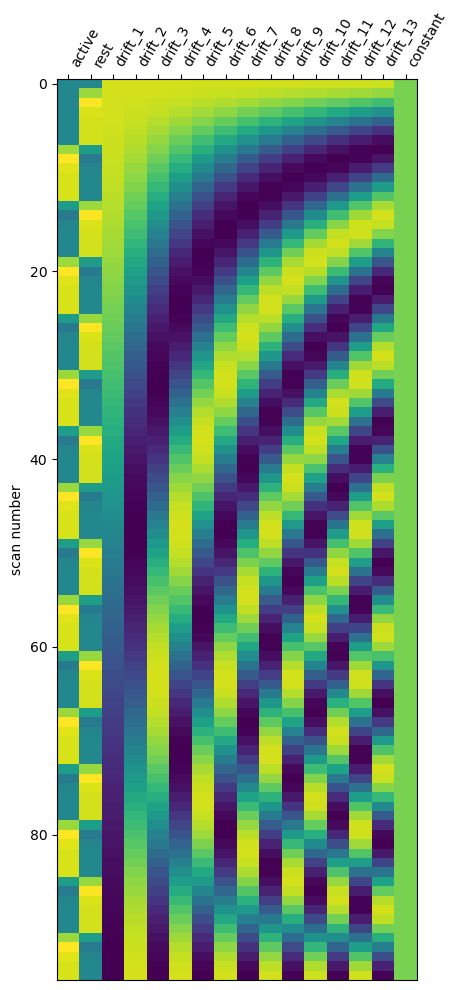

In [8]:
import matplotlib.pyplot as plt

from nilearn.plotting import plot_design_matrix

plot_design_matrix(design_matrix)

plt.show()

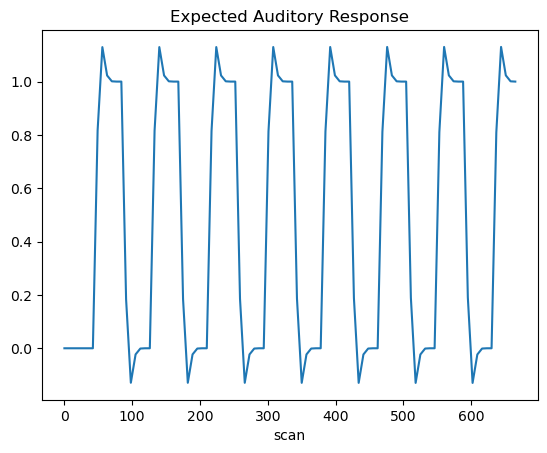

In [9]:
import os

outdir = "results"
if not os.path.exists(outdir):
    os.mkdir(outdir)

from os.path import join

plot_design_matrix(
    design_matrix, output_file=join(outdir, "design_matrix.png")
)

plt.plot(design_matrix["active"])
plt.xlabel("scan")
plt.title("Expected Auditory Response")
plt.show()

<Axes: label='conditions'>

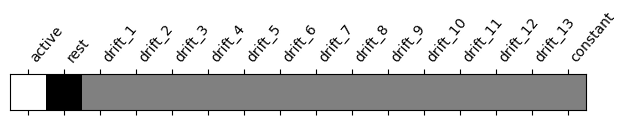

In [65]:
import numpy as np

conditions = {"active": np.zeros(16), "rest": np.zeros(16)}
conditions["active"][0] = 1
conditions["rest"][1] = 1

active_minus_rest = conditions["active"] - conditions["rest"]
from nilearn.plotting import plot_contrast_matrix

plot_contrast_matrix(active_minus_rest, design_matrix=design_matrix)

In [66]:
conditions

{'active': array([1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.]),
 'rest': array([0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])}

In [11]:
eff_map = fmri_glm.compute_contrast(
    active_minus_rest, output_type="effect_size"
)
z_map = fmri_glm.compute_contrast(active_minus_rest, output_type="z_score")

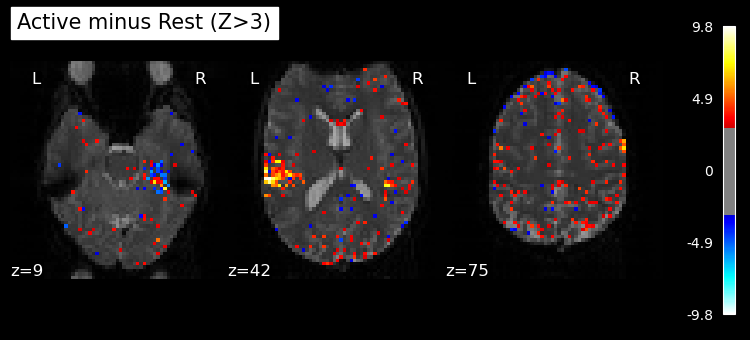

In [12]:
plot_stat_map(
    z_map,
    bg_img=mean_img,
    threshold=3.0,
    display_mode="z",
    cut_coords=3,
    black_bg=True,
    title="Active minus Rest (Z>3)",
)
plt.show()

Uncorrected p<0.001 threshold: 3.291


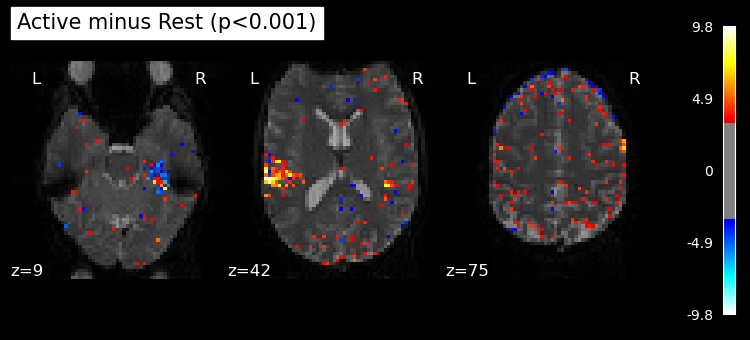

In [13]:
from nilearn.glm import threshold_stats_img

_, threshold = threshold_stats_img(z_map, alpha=0.001, height_control="fpr")
print(f"Uncorrected p<0.001 threshold: {threshold:.3f}")
plot_stat_map(
    z_map,
    bg_img=mean_img,
    threshold=threshold,
    display_mode="z",
    cut_coords=3,
    black_bg=True,
    title="Active minus Rest (p<0.001)",
)
plt.show()

Bonferroni-corrected, p<0.05 threshold: 4.934


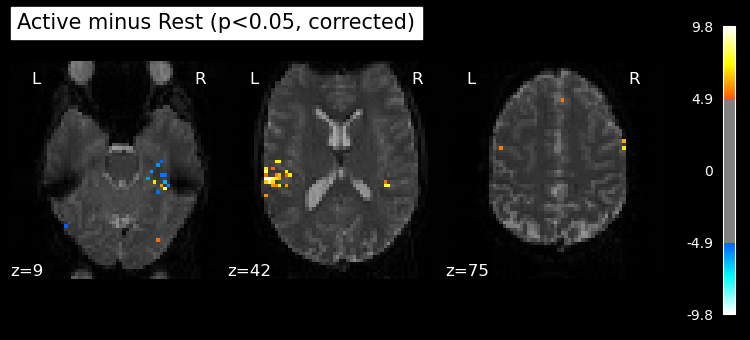

In [14]:
_, threshold = threshold_stats_img(
    z_map, alpha=0.05, height_control="bonferroni"
)
print(f"Bonferroni-corrected, p<0.05 threshold: {threshold:.3f}")
plot_stat_map(
    z_map,
    bg_img=mean_img,
    threshold=threshold,
    display_mode="z",
    cut_coords=3,
    black_bg=True,
    title="Active minus Rest (p<0.05, corrected)",
)
plt.show()

False Discovery rate = 0.05 threshold: 2.904


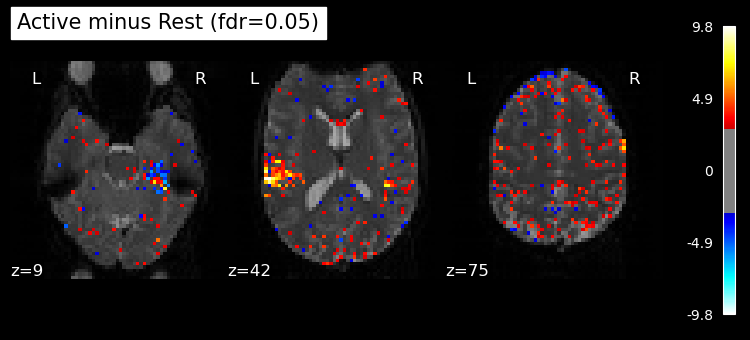

In [15]:
_, threshold = threshold_stats_img(z_map, alpha=0.05, height_control="fdr")
print(f"False Discovery rate = 0.05 threshold: {threshold:.3f}")
plot_stat_map(
    z_map,
    bg_img=mean_img,
    threshold=threshold,
    display_mode="z",
    cut_coords=3,
    black_bg=True,
    title="Active minus Rest (fdr=0.05)",
)
plt.show()

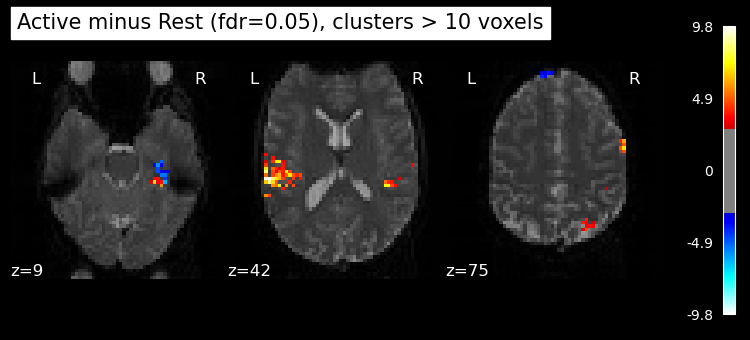

In [16]:
clean_map, threshold = threshold_stats_img(
    z_map, alpha=0.05, height_control="fdr", cluster_threshold=10
)
plot_stat_map(
    clean_map,
    bg_img=mean_img,
    threshold=threshold,
    display_mode="z",
    cut_coords=3,
    black_bg=True,
    title="Active minus Rest (fdr=0.05), clusters > 10 voxels",
)
plt.show()

In [17]:
z_map.to_filename(join(outdir, "active_vs_rest_z_map.nii.gz"))
eff_map.to_filename(join(outdir, "active_vs_rest_eff_map.nii.gz"))

In [18]:
from nilearn.reporting import get_clusters_table

table = get_clusters_table(
    z_map, stat_threshold=threshold, cluster_threshold=20
)
table

,Cluster ID,X,Y,Z,Peak Stat,Cluster Size (mm3)
0,1,-60.0,-6.0,42.0,9.811979,4050
1,1a,-63.0,6.0,36.0,8.601922,
2,1b,-63.0,0.0,42.0,8.435063,
3,1c,-48.0,-15.0,39.0,8.364058,
4,2,60.0,0.0,36.0,9.605128,1512
5,2a,45.0,-12.0,42.0,7.590200,
6,3,63.0,12.0,27.0,8.253889,972
7,3a,51.0,3.0,30.0,6.968355,
8,3b,54.0,9.0,39.0,3.565609,
9,4,36.0,-3.0,15.0,8.087451,1188


In [19]:
table.to_csv(join(outdir, "table.csv"))

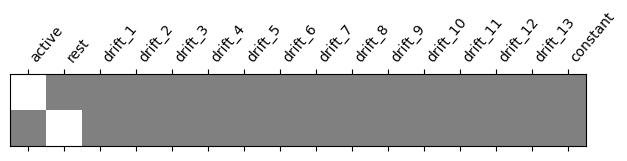

In [20]:
effects_of_interest = np.vstack((conditions["active"], conditions["rest"]))
plot_contrast_matrix(effects_of_interest, design_matrix)
plt.show()

z_map = fmri_glm.compute_contrast(effects_of_interest, output_type="z_score")

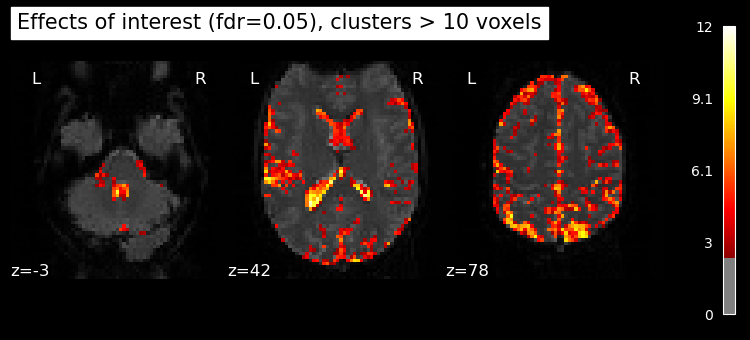

In [21]:
clean_map, threshold = threshold_stats_img(
    z_map, alpha=0.05, height_control="fdr", cluster_threshold=10
)
plot_stat_map(
    clean_map,
    bg_img=mean_img,
    threshold=threshold,
    display_mode="z",
    cut_coords=3,
    black_bg=True,
    title="Effects of interest (fdr=0.05), clusters > 10 voxels",
)
plt.show()